<div class="alert alert-warning">

**Disclaimer:**

This notebook is not maintained. The functionality presented here is not guaranteed to work with the latest version of eo-learn.   
</div>

## Social Media Data in eo-learn

We'll load example twitter data as georeferenced vector points and aggregate them into a raster layer for further analysis

In [1]:
%matplotlib inline

In [6]:
import datetime as datetime
import geopandas as gpd
from matplotlib import pyplot as plt
from rasterio.enums import MergeAlg

from eolearn.geometry import VectorToRaster
from eolearn.io import SentinelHubInputTask
from eolearn.core import EOPatch, FeatureType
from sentinelhub import BBox, CRS, DataCollection

In [3]:
# read in Paris example twitter data
tweets = gpd.read_file('twitter_data.geojson')

In [13]:
# get sentinel satellite imagery for comparison
s2 = SentinelHubInputTask(
    data_collection=DataCollection.SENTINEL2_L1C,
    bands=['B04','B03','B02'],
    bands_feature=(FeatureType.DATA, 'trueColorBands'),
    resolution=(10, 10),
    maxcc=0.1,
    time_difference=datetime.timedelta(hours=2),
    max_threads=3
)

In [14]:
# use a single patch for demonstration purposes
eopatch = s2.execute(bbox=BBox([2.2445, 48.8185, 2.4032, 48.9002], crs=CRS.WGS84), time_interval=('2019-06-01', '2019-06-30'))

In [7]:
# when rasterizing our data, count each tweet (values=1)
# and sum them in each pixel (merge_alg=MergeAlg.add)
vtr = VectorToRaster(
    tweets,
    (FeatureType.DATA_TIMELESS, 'tweet_density'),
    values=1,
    raster_resolution=250,
    merge_alg=MergeAlg.add
)

In [ ]:
eopatch = vtr.execute(eopatch)

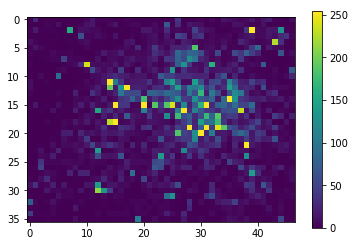

In [7]:
# view our tweet density (change the resolution of the "vtr" task to change the spatial aggregation size)
plt.imshow(eopatch.data_timeless['tweet_density'][:,:,0])
c = plt.colorbar()

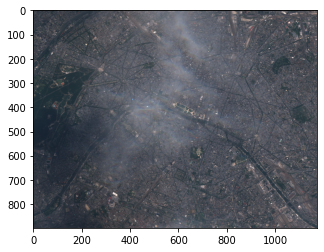

In [20]:
# compare this with the satellite data; this could potentially be used
# for population density modeling or other types of analyses
plt.imshow(2.5*eopatch.data['trueColorBands'][0]);